# <font color = "red">[READ THIS] Before you start</font>
Welcome to UpLevel DIY projects! In this series, you're challenged to independently work (with our guidance) with data that you will collect to UpLevel yourself. 

We hope you're excited to embark on this adventure.
### Warning:
This isn't just any coding course or programmes, where you receive helper code as you move from one code block to another. 

This is when things get <em>real</em>.

In this project, you will receive instructions to execute a task along with an intended outcome. Most importantly, we will provide you with directions you can go to, to pick up code independently and implement it in this notebook.

Don't worry though, we'll be dropping lots of resources you can consult and these readings will contain everything you need to succeed. You can also perform independent research to find answers independently. You just have to read closely and pick out the parts that make most sense. 

<strong>We make you do this not because we're lazy bastards but because being able to indepedently find code is a highly underrated skill and that's something all companies look out for.</strong>

If you're really stuck and are on the verge of giving up, we gotchu fam. Head on over to https://www.facebook.com/UpLevelSG/ and post your questions there. 

### What we'll be doing:
In this project, we will do the following:

1. Download Urban Dictionary text corpus and clean the data up (Part I)
2. Perform wordcloud analysis (Part II)
3. Transform the data for feature extraction and apply machine learning techniques to train a model to predict whether an Urban Dictionary  (Part III)

### Expectations:
We're not going to sugarcoat it - it'll be challenging at times. You have to promise to put in the time and effort to UpLevel yourself. 

But we promise you that it'll ultimately be fun and rewarding, and you'll come out of it stronger and more confident than before.

<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>You're a data analyst working in Urban Dictionary.</p>
<p>There has been a lot of complaints regarding hate speech, misogyny, and racism in the definitions found in the database.</p> 
<p>Determined, you decided to manually annotate the definitions and judge whether the definition is misogynist or otherwise. Misogyny means "dislike of, contempt for, or ingrained prejudice against women.", i.e. any definitions that disparage women.</p>
<p>In this project, you will use the dataset you've annotated to build a machine learning model to classify for misogyny.</p> 
</div>

### Step 1: Download the dataset and unzip
The dataset that we will work with comes from the hard work of Theodore Lynn and her team, who manually annotated Urban Dictionary definitions. More information can be found in a research publication <a href='https://www.sciencedirect.com/science/article/pii/S2352340919305773'>here</a>.

Download the data <a href = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/3jfwsdkryy-3.zip'>here</a>, or if you can't, do it <a href = 'https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectUrbanDictionaryMisogyny/3jfwsdkryy-3.zip'>here</a> instead.

It is a zip file containing only one CSV file so extract that into this project directory for easy access.

### Step 2: Import pandas
Let's take a look at the file, starting with importing pandas.

In [1]:
# Step 2: Import pandas
import pandas as pd

### Step 3: Read the CSV as a DataFrame
Time to read the DataFrame with pandas - let's take a look. 

However, if you read the CSV as it is, you <em>might</em> encounter an encoding problem. Fix the encoding problem by using the parameter 'encoding' when you read your CSV.

<strong>Hint: Google the error code at the very end</strong>

In [2]:
# Step 3: Read the CSV and specify the right encoding
df = pd.read_csv('ManualTag_Misogyny.csv', encoding='latin-1')

### Step 4: Find the total number of rows with empty values
Let's count the total number of missing data in each column.

In [3]:
# Step 4: Count the sum of null values in your columns
print(df.isnull().sum())

Definition     0
is_misogyny    1
dtype: int64


### Step 5: Identify where the missing row is
Turns out there is almost no missing data, except one particular row.

<strong>Hint: Google "how to select rows with NaN in particular column?"</strong>

In [4]:
# Step 5: Find the index of the row containing missing row
index = df[df['is_misogyny'].isnull()].index
print(df.loc[index])

                                             Definition  is_misogyny
1251  When someone makes a post on Facebook and you ...          NaN


### Step 6: Read the definition of the row containing the missing 'is_misogyny' value
There are a few ways to do this, either through coding here or going to the CSV directly and reading the definition. 

In [5]:
# Step 6: Read the definition of the row with missing value
df['Definition'].loc[index]

1251    When someone makes a post on Facebook and you ...
Name: Definition, dtype: object

### Step 7: Replace NaN with the appropriate label
Looks like the definition is harmless, let's replace it with a 0.

<strong>Hint: Google "replace nan with 0 pandas"</strong>

In [6]:
# Step 7: Fill the Nan with 0
df['is_misogyny'] = df['is_misogyny'].fillna(0)

### Step 8: Check if your replacement is successful
Make sure there's no more Nan

In [7]:
# Step 8: Check the sum of nulls again
print(df.isnull().sum())

Definition     0
is_misogyny    0
dtype: int64


### Step 9: Count the values for 'is_misogyny' column
Let's take a look at the proportion of definitions which are not misogynist and misogynist.

In [8]:
# Step 10: Count the values for 'is_misogyny' column
df['is_misogyny'].value_counts()

0.0    1252
1.0    1034
Name: is_misogyny, dtype: int64

## Data cleaning
Let's do some cleaning first before we move onto the next Part. 

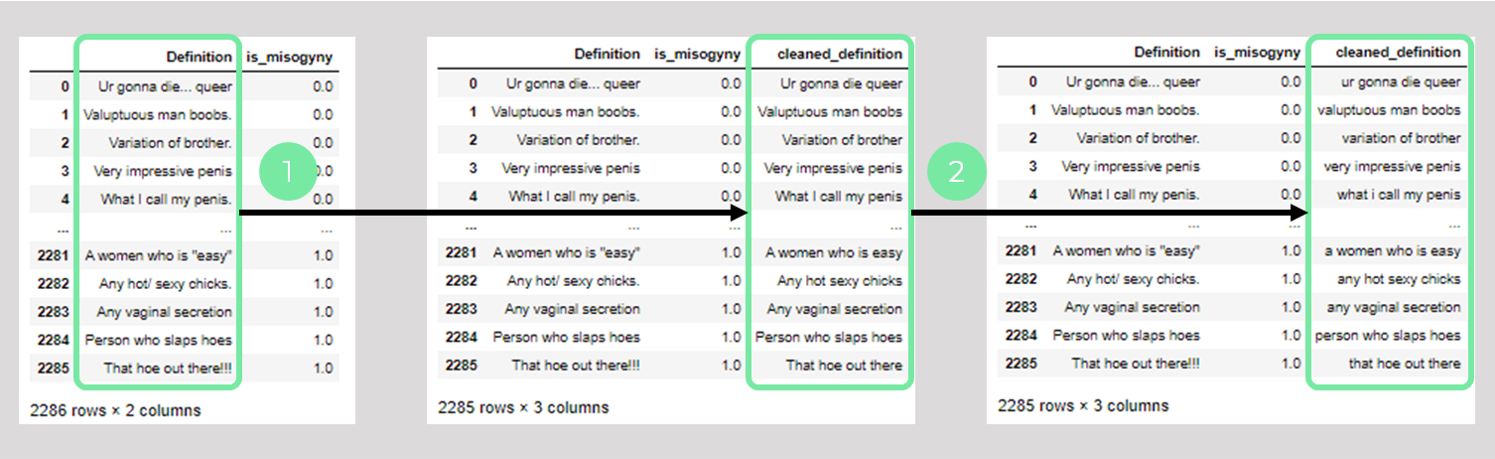

We'll be doing two things:
1. removing punctuations from our definitions
2. lowercasing the text

### Step 10: Remove punctuation from the text
We'll start with removing punctuation from all of the values in the 'definition' column. 

Create a new column named 'cleaned_definition' that contains the text without punctuations.

<strong>Hint: Google "remove punctuation from column python"</strong>

In [9]:
# Step 10: Create a new column that contains no punctuation
df['cleaned_definition'] = df['Definition'].str.replace('[^\w\s]','')

### Step 11: Lower the cases in the new column
Next up, lower the cases in the values in 'cleaned_definition' so that strings that are in different cases can be counted as the same string in subsequent analyses. 

<strong>Hint: Google "pandas lowercase"</strong>

In [10]:
# Step 11: Lowercase the values in 'cleaned_definition'
df['cleaned_definition'] = df['cleaned_definition'] .str.lower()

### Step 12: Export cleaned DataFrame as CSV
Now that we've done some basic cleaning, time to export our DataFrame to a CSV file.

In [14]:
# Step 12: Export the DataFrame to CSV
df.to_csv('ManualTag_Misogyny_Clean.csv', index=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Definition          2286 non-null   object 
 1   is_misogyny         2286 non-null   float64
 2   cleaned_definition  2286 non-null   object 
dtypes: float64(1), object(2)
memory usage: 53.7+ KB


### End of Part I
In this Part, we retrieve the data from a research team and performed basic cleaning before exporting it for subsequent Parts.

In Part II, we will visualize the text data using wordcloud analysis.